In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.grid'] = True

import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
import scipy.stats as stats

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import metrics
from functools import reduce

In [2]:
d1=pd.read_csv('C:\\Users\\Yash\\Desktop\\STATS\\CASE STUDY FOR PANDAS\\4. Pandas Case Study 2 - Credit Card Case Study\\Customer Acqusition.csv')
d2=pd.read_csv('C:\\Users\\Yash\\Desktop\\STATS\\CASE STUDY FOR PANDAS\\4. Pandas Case Study 2 - Credit Card Case Study\\Repayment.csv')
d3=pd.read_csv('C:\\Users\\Yash\\Desktop\\STATS\\CASE STUDY FOR PANDAS\\4. Pandas Case Study 2 - Credit Card Case Study\\spend.csv')


In [3]:
d1.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
d2.head(2)

,SL No:,Customer,Month,Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,03-Jan-04,245899.02


In [5]:
d3.head(1)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.8


In [6]:
#Q1 A


In [7]:
d1.loc[(d1.Age<18),'Age']=d1.Age.mean()
d1.Age


0     76.0
1     71.0
2     34.0
3     47.0
4     56.0
      ... 
95    54.0
96    58.0
97    51.0
98    35.0
99    36.0
Name: Age, Length: 100, dtype: float64

In [8]:
#B

In [9]:
a1=pd.merge(left=d1,right=d3,on='Customer',how = 'inner',indicator = True)


In [10]:
a1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   No        1500 non-null   int64   
 1   Customer  1500 non-null   object  
 2   Age       1500 non-null   float64 
 3   City      1500 non-null   object  
 4   Product   1500 non-null   object  
 5   Limit     1500 non-null   float64 
 6   Company   1500 non-null   object  
 7   Segment   1500 non-null   object  
 8   Sl No:    1500 non-null   int64   
 9   Month     1500 non-null   object  
 10  Type      1500 non-null   object  
 11  Amount    1500 non-null   float64 
 12  _merge    1500 non-null   category
dtypes: category(1), float64(3), int64(2), object(7)
memory usage: 153.9+ KB


In [11]:
a1.head()


,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,both
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,both
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,both
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,both


In [12]:
a1['Amount']=np.where(a1.Amount>a1.Limit,a1.Limit/2,a1.Amount)


In [13]:
a1.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,both
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,both
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,both
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,both


In [14]:
#C

In [15]:
d2=pd.merge(left=d1,right=d2,on='Customer')

In [16]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Age       1500 non-null   float64
 3   City      1500 non-null   object 
 4   Product   1500 non-null   object 
 5   Limit     1500 non-null   float64
 6   Company   1500 non-null   object 
 7   Segment   1500 non-null   object 
 8   SL No:    1500 non-null   int64  
 9   Month     1500 non-null   object 
 10  Amount    1500 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 140.6+ KB


In [17]:
d2.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,03-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,165972.88


In [18]:
d2['Amount']=np.where(d2.Amount>d2.Limit,d2.Limit,d2.Amount)

In [19]:
d2.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,03-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,165972.88


In [20]:
#A

In [21]:
a1['Customer'].drop_duplicates().count()

100

In [22]:
d2['Customer'].drop_duplicates().count()

100

In [23]:
#B

In [24]:
a1['Product'].drop_duplicates().count()

3

In [25]:
d2['Segment'].drop_duplicates().count()

5

In [26]:
a1['Type'].drop_duplicates().count()

15

In [27]:
#C
d3.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [28]:
d3=a1.groupby(['Customer','Month'])[['Amount']].mean().reset_index()



In [29]:
d3['spendMonth'] = pd.DatetimeIndex(d3['Month']).month 

In [30]:
AvgMonSpend=d3.groupby(['Customer','spendMonth'])[['Amount']].mean().reset_index()

In [31]:
AvgMonSpend.head()

,Customer,spendMonth,Amount
0,A1,1,341332.87700
1,A1,2,138421.15125
2,A1,4,261649.25000
3,A1,5,361141.31000
4,A1,8,344372.10000


In [32]:
#D

In [33]:
d2=d2.groupby(['Customer','Month'])[['Amount']].mean().reset_index()

In [34]:
d2['repaMonth'] = pd.DatetimeIndex(d2['Month']).month 

In [35]:
AvgMonRepayment=d2.groupby(['Customer','repaMonth'])[['Amount']].mean().reset_index()

In [36]:
AvgMonRepayment.head()

,Customer,repaMonth,Amount
0,A1,1,325723.331
1,A1,2,137713.785
2,A1,4,254474.580
3,A1,7,297176.740
4,A1,9,186427.500


In [37]:
#E

In [38]:
AvgMonCustomers=pd.merge(left=AvgMonSpend,right=AvgMonRepayment,left_on=['Customer','spendMonth'],right_on=['Customer','repaMonth'])

In [39]:
AvgMonCustomers['Monthly_Profit']=AvgMonCustomers.Amount_y-AvgMonCustomers.Amount_x

In [40]:
AvgMonCustomers['Profit']=np.where(AvgMonCustomers['Monthly_Profit']>0,AvgMonCustomers['Monthly_Profit']*2.9/100,np.nan)

In [41]:
AvgMonCustomers.head(20)

,Customer,spendMonth,Amount_x,repaMonth,Amount_y,Monthly_Profit,Profit
0,A1,1,341332.877000,1,325723.331000,-15609.546000,NaN
1,A1,2,138421.151250,2,137713.785000,-707.366250,NaN
2,A1,4,261649.250000,4,254474.580000,-7174.670000,NaN
3,A1,11,183839.610000,11,285729.090000,101889.480000,2954.794920
4,A10,1,173828.282500,1,283324.721667,109496.439167,3175.396736
5,A10,2,170265.770000,2,217344.503333,47078.733333,1365.283267
6,A10,3,134631.266667,3,240130.543333,105499.276667,3059.479023
7,A10,4,270721.680000,4,120467.322500,-150254.357500,NaN
8,A10,5,189207.392500,5,98672.695000,-90534.697500,NaN
9,A10,7,239798.030000,7,358194.650000,118396.620000,3433.501980


In [42]:
#F
d3.head()

,Customer,Month,Amount,spendMonth
0,A1,1-Feb-05,23370.20,2
1,A1,12-Jan-04,463017.01,1
2,A1,15-Jan-04,23740.46,1
3,A1,17-Jan-05,369694.07,1
4,A1,19-Apr-06,346925.68,4


In [43]:
a1.groupby('Type').Amount.sum().reset_index().sort_values('Amount',ascending=False)

,Type,Amount
10,PETRO,28597384.98
4,CAMERA,27690738.44
7,FOOD,20519243.60
0,AIR TICKET,20155847.12
14,TRAIN TICKET,19995825.72
13,SHOPPING,17106660.97
3,BUS TICKET,16279935.35
9,MOVIE TICKET,13001899.29
6,CLOTHES,12302511.36
11,RENTAL,11850628.72


In [44]:
#G

In [45]:
a1.groupby('City').Amount.sum().reset_index().sort_values('Amount',ascending=False)

,City,Amount
4,COCHIN,45963513.50
2,CALCUTTA,41108132.30
0,BANGALORE,40461647.02
1,BOMBAY,28603127.38
3,CHENNAI,22128635.65
7,TRIVANDRUM,15337155.87
6,PATNA,15260586.97
5,DELHI,10918286.54


In [46]:
#H

In [47]:
a1['Age_Group']=np.where(((a1.Age.astype(int) >= 18) & (a1.Age.astype(int) < 25)), 'Youth',np.where(((a1.Age.astype(int) >= 25) & (a1.Age.astype(int) < 65)), 'Adult','Senior'))

In [48]:
a1.groupby('Age_Group').Amount.sum()

Age_Group
Adult     1.674181e+08
Senior    3.768249e+07
Youth     1.468050e+07
Name: Amount, dtype: float64

In [49]:
#I

In [50]:
d2.groupby('Customer').Amount.sum().reset_index().sort_values('Amount',ascending=False).head()

,Customer,Amount
5,A13,8.191193e+06
58,A61,7.872576e+06
40,A45,7.472656e+06
4,A12,7.148908e+06
38,A43,7.052010e+06


In [51]:
#Q3

In [52]:
a1['Month'] = pd.to_datetime(a1['Month'])
a1['year'] = a1['Month'].dt.year

grup = a1.groupby(["City","Product","year"])            

amount = grup[["Amount"]].sum().add_prefix("Total_")
amount

Total_Amount
City       Product  year              
BANGALORE  Gold     2004    9289878.54
                    2005   12892362.99
                    2006   12030611.09
           Platimum 2004    1112732.30
                    2005     912284.97
...                                ...
TRIVANDRUM Platimum 2005    3601443.30
                    2006    2147403.75
           Silver   2004     209667.48
                    2005     269912.99
                    2006     555862.12

[72 rows x 1 columns]

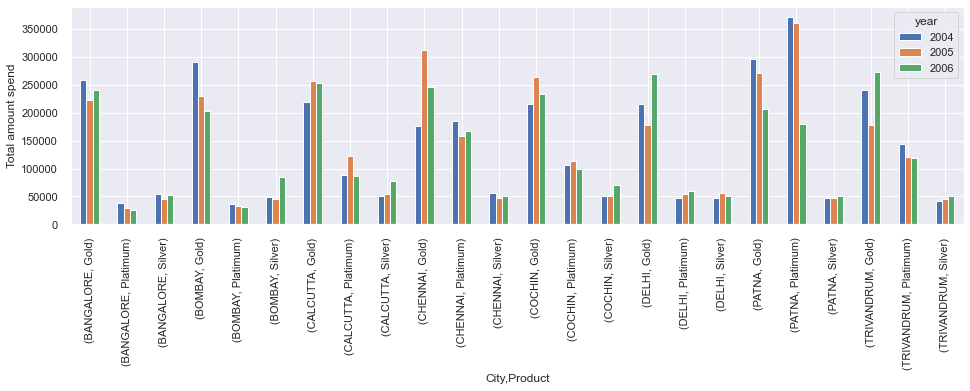

In [53]:
sns.set()
pd.pivot_table(a1, index =['City','Product'],columns ='year',values ='Amount').plot.bar(figsize=(16,4))
plt.ylabel('Total amount spend')
plt.show()

In [54]:
#Q4 A

C:\Users\Yash\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


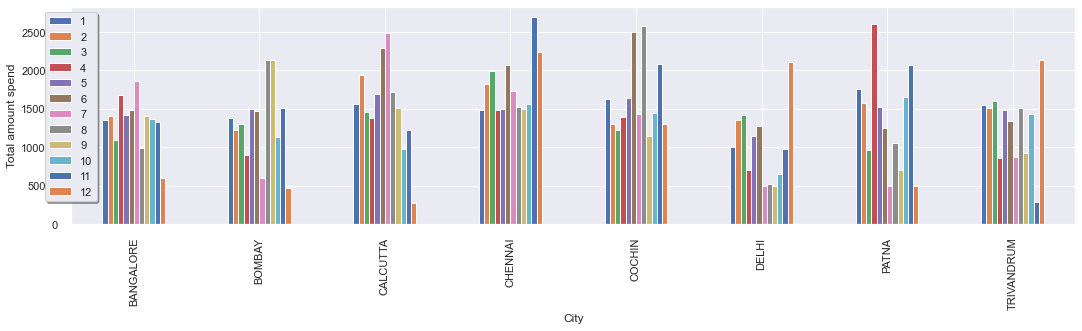

In [55]:
a1['Month'] = pd.to_datetime(a1['Month'])
a1['month'] = a1['Month'].dt.month

sns.set()
pd.pivot_table(a1, index ='City',columns ='month',values="Amount").plot(kind='bar',figsize=(18,4))
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(0,1), shadow=True, ncol=1)
plt.ylabel('Total amount spend')
plt.show()


#d2['repaMonth'] = pd.DatetimeIndex(d2['Month']).month 

In [56]:
#B

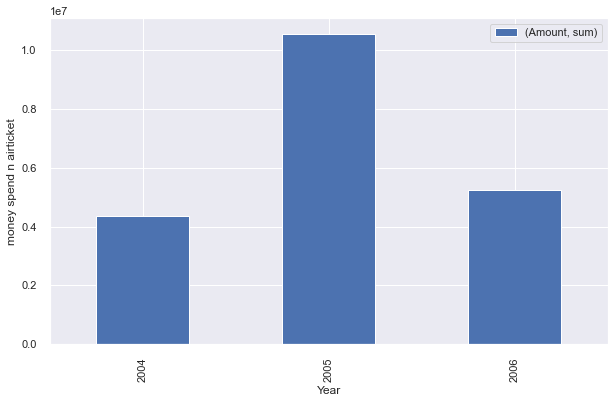

In [57]:
a1['Month'] = pd.to_datetime(a1['Month'])
a1['Year'] = a1['Month'].dt.year

s = a1.loc[(a1.Type == 'AIR TICKET')]
spending = s.groupby(['Year']).aggregate({'Amount':['sum']})

spendinggraph=spending.plot.bar(figsize=(10,6))
plt.legend()
plt.ylabel('money spend n airticket')
plt.show()


In [58]:
#C

In [59]:
g = a1.groupby(["Product","month"])            
tot_amount = g[["Amount"]].sum().add_prefix("Total_")
tot_amount

Total_Amount
Product  month              
Gold     1       32413831.83
         2       24779179.55
         3       19256972.48
         4       13170572.59
         5       21548169.76
         6        6538862.64
         7        5167416.37
         8        4954030.42
         9        3816887.62
         10       3018223.38
         11       9203267.46
         12       2332940.96
Platimum 1       14951578.51
         2        9134054.58
         3        7288837.68
         4        5182493.86
         5        8151926.49
         6        2965712.71
         7        1288156.26
         8        1714762.80
         9        1667840.84
         10        550275.04
         11       2741618.42
         12        750156.19
Silver   1        4206383.62
         2        2087018.37
         3        3909405.83
         4        1902322.65
         5        2140940.01
         6         689537.61
         7         530153.72
         8         293109.82
         9         442803.13
         10        100001.50
         11        691102.63
         12        200537.90

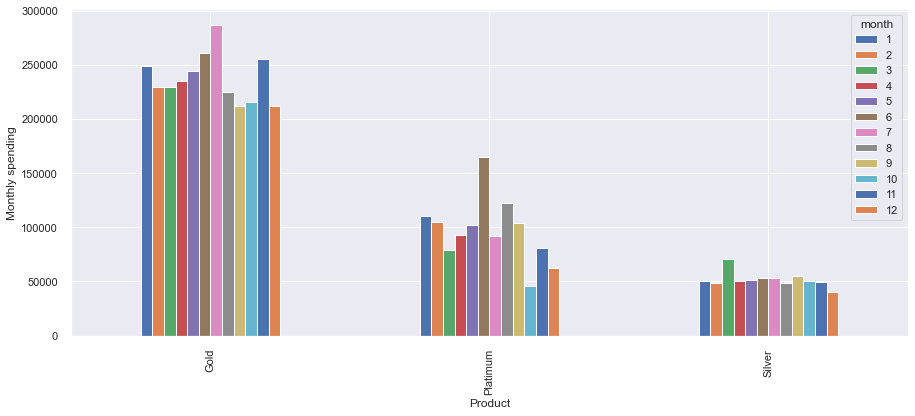

In [60]:
sns.set()
pd.pivot_table(a1, index ='Product',columns ='month',values ='Amount').plot.bar(figsize=(15,6))
plt.ylabel('Monthly spending')
plt.show()


In [61]:
#Q5

In [62]:
a1['yearly']=pd.DatetimeIndex(a1['Month']).year
a1['monthly']=pd.DatetimeIndex(a1['Month']).month

#d2['Monthly']=pd.DatetimeIndex(a1['Month']).month

In [63]:
a1.Product

0           Gold
1           Gold
2           Gold
3           Gold
4           Gold
          ...   
1495      Silver
1496    Platimum
1497    Platimum
1498    Platimum
1499      Silver
Name: Product, Length: 1500, dtype: object

In [64]:
def top(category,time):
    return a1.loc[(a1.Product == category)].groupby(['Customer','City','Product',time]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head()

In [65]:
category=str(input("Enter Product Category in Gold/Silver/Platinum --"))
time=str(input("Enter Time Period in yearly/monthly --"))

Enter Product Category in Gold/Silver/Platinum --Gold
Enter Time Period in yearly/monthly --yearly


In [66]:
Customers=top(category,time)

In [67]:
Customers

,Customer,City,Product,yearly,Amount
61,A60,CALCUTTA,Gold,2005,4469330.26
10,A12,BOMBAY,Gold,2005,4228581.52
64,A61,COCHIN,Gold,2005,3930624.30
31,A27,CHENNAI,Gold,2005,3740945.58
62,A60,CALCUTTA,Gold,2006,3670193.79
